# A CLUSTER ANALYSIS OF NBA PLAYERS

----

In [1]:
import sys
sys.path.append('/Users/sinsanghun/anaconda/lib/python2.7/site-packages')

pd.options.display.max_columns = 160
pd.options.display.max_rows = 350
%matplotlib inline

In [2]:
data = pd.read_csv("player.csv")
data = data.iloc[:,1:]

data = data[data["Games"]>=31]
data = data[data["Min"]>=12]
data.shape

(5772, 152)

In [16]:
dfy = data[["Pos"]]
dfX = data.iloc[:, 4:data.shape[1]-1]

In [17]:
from sklearn.preprocessing import StandardScaler
dfX= pd.DataFrame(StandardScaler().fit_transform(dfX), columns=dfX.columns)

----

----

# 2. Clustering after dimension reduction by LDA

In [18]:
from sklearn.lda import LDA
lda = LDA(n_components=2)
ldaDf = lda.fit_transform(dfX, dfy)

In [19]:
ldaDf = pd.DataFrame(ldaDf)

In [20]:
dfX = dfX.reset_index()
del dfX["index"]

In [21]:
dfy = dfy.reset_index()
del dfy["index"]

In [26]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=10, init="random", algorithm="full").fit(ldaDf)

In [27]:
model = model.predict(ldaDf)
ldaDf["cluster"] = model

In [28]:
ldaDf["cluster"].value_counts()

8    811
2    766
9    733
1    654
6    603
7    502
3    501
0    435
4    404
5    363
Name: cluster, dtype: int64

-----

-----

# 3. The individual effects of the clusters on winning and losing

## 20년간 평균 팀 득점으로 winning, losing team 분류 

In [266]:
team = pd.read_csv("nbateam.csv")

In [267]:
team.head()

,Team,Team_Pts,Season
0,Atlanta Hawks,107.79,1996-1997
1,Boston Celtics,103.67,1996-1997
2,Charlotte Hornets,110.43,1996-1997
3,Chicago Bulls,113.79,1996-1997
4,Cleveland Cavaliers,104.47,1996-1997


In [268]:
avg_team = team["Team_Pts"].mean()

In [269]:
team_arr = np.array(team["Team"])

In [270]:
Team_name = []
for i in range(len(team_arr)):
    split = team_arr[i].split(" ")
    Team_name.append(split[len(split)-1])

In [271]:
team["Team"] = Team_name
team["diff_Pts"] = team["Team_Pts"] - avg_team

In [272]:
team["WL"] = 0
team["WL"][team["diff_Pts"] > 0] = 1
del team["Team_Pts"]

/Users/sinsanghun/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [273]:
team.head()

,Team,Season,diff_Pts,WL
0,Hawks,1996-1997,2.000322,1
1,Celtics,1996-1997,-2.119678,0
2,Hornets,1996-1997,4.640322,1
3,Bulls,1996-1997,8.000322,1
4,Cavaliers,1996-1997,-1.319678,0


In [274]:
data.shape

(5772, 152)

In [275]:
new_data = pd.merge(data, team, on= ["Team", "Season"], how="left")
new_data.shape

(5772, 154)

Sixers -> 76ers  

Bullets -> Wizards

Trail Blazers -> TrailBlazers 


In [276]:
data["Team"][data["Team"]=="TrailBlazers" ] = "Trailblazers"

/Users/sinsanghun/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [277]:
Team2 = []
for i in range(data.shape[0]):
    Team2.append(np.array(data["Team"])[i].split(",")[0])

In [98]:
data["Team"] = Team2

## 클러스터별 winning losing 비교 

In [278]:
new_data.head()

,Player,Team,Season,Season Type,Games,Above the Break 3-Usage,Mid-Range-Usage,In The Paint (Non-RA)-Usage,Restricted Area-Usage,Right Corner 3-Usage,Left Corner 3-Usage,Backcourt-Usage,Above the Break 3 %,Mid-Range %,In The Paint (Non-RA) %,Restricted Area %,Right Corner 3 %,Left Corner 3 %,Backcourt %,Personal Fouls PG,Charges Drawn,Off. Fouls Drawn,Off. Fouls,Clear Path Fouls,Defensive 3 Seconds,Shooting Fouls Committed,Lost Ball Fouls,Technical Fouls,Flag. Foul Type 1,Flag. Foul Type 2,Ejections,Technicals,Flagrant Type1 Fouls,Flagrant Type2 Fouls,Offensive Fouls,Defensive 3secs,Defensive Goaltendings,Kicked Ball Vio.,DNP-Coach's Decision,Blocks Against,Total Points,FGM_x,FGA_x,FG%_x,FG% Diff.,3FGM,3FGA,3FG%,3FG% Diff.,FTM_x,FTA_x,FT%_x,FT% Diff.,EFG%,Assisted FG Pct.,Blocked FG Pct.,Last Min. FGM,Last Min. FGA,Last Min. FG%,Avg. Shot Dist.,Avg. Made Shot Dist.,EFg%,Ts%,Total Plus/Minus,Plus/Minus Per Game,Eff.,FT Rate,Triple Doubles,Double Doubles,25+ Pts Games,10+ Reb Games,10+ Ast Games,3+ Blk Games,3+ Stl Games,3+ 3PTM Games,Total TO PG,Bad Pass TO PG,Lost Ball TO PG,Traveling PG,Offensive Foul TO PG,Three Sec. Vio. TO PG,24 Sec. Vio. TO PG,Backcourt Vio. TO PG,Step Out Of Bounds TO PG,Out of Bounds TO PG,Poss. Lost Ball TO PG,Stolen Turnover Rate,Less than 8ft. %,8-16 feet %,16-24 feet %,24+ feet %,Back Court Shots %,Less than 8ft. usage %,8-16 feet usage %,16-24 feet usage %,24+ feet usage %,Back Court Shots usage %,Avg. Shot Dis.(ft.),Avg. Made Shot Dis.(ft.),Avg. Missed Shot Dis.(ft.),Assisted FGM %,Jump Shots,Layups,Dunks,Tip-ins,Jump Shot %,Layup %,Dunk Shot %,Tip-in %,2 Point Shot Points Pct.,3 Point Shot Points Pct.,Free Throw Points Pct.,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,PF,FGM_y,FGA_y,FG%_y,3PTM,3PTA,3PT%,FTM_y,FTA_y,FT%_y,Four Point Plays,Completed Four Point Plays,And One,Completed Three Point Plays,Extra Free Throw Percentage,Free Throw Rate Difference,Assist/TO Ratio,Assisted FG %,Assisted 2Pts %,Assisted 3Pts %,Assisted Dunk %,Assisted Layup %,Assisted Jump Shot %,Assists to Dunks PG,Assists to Layups PG,Assists to Jump Shots PG,Assists to 3 Pointers PG,Avg. Assisted Shot Distance,Avg. Assisted Jump Shot Distance,Assist PG,Pos,diff_Pts,WL
0,Kobe Bryant,Lakers,2005-2006,REG,80,21.72,44.91,10.45,20.75,1.15,0.87,0.14,0.350,0.424,0.493,0.601,0.280,0.474,0.0,2.91,0,12,48,0,0,112,12,12,2,0,0,12,2,0,48,0,1,4,0,82,167,48,132,0.364,-0.086,7,32,0.219,-0.129,64,76,0.842,-0.008,0.390,0.229,0.038,12,42,0.286,16.49,14.69,0.491,0.559,320,4.00,27.83,0.320,0,4,68,2,2,0,24,33,3.13,0.83,0.95,0.18,0.60,0.01,0,0.04,0.11,0.28,0.08,0.51,0.579,0.454,0.421,0.351,0.0,25.49,17.63,33.00,23.70,0.18,14.74,13.00,16.16,43.76,79.52,17.44,2.85,0.18,0.411,0.546,0.952,0.250,56.36,19.07,24.58,40.96,35.40,0.89,4.43,5.31,4.50,1.84,0.38,3.13,2.91,12.23,27.16,0.450,2.25,6.48,0.347,8.70,10.24,0.850,1.0,1.0,67.0,56.0,0.838,-0.012,1.440,43.76,37.72,70.56,64.41,27.05,46.98,0.70,1.08,2.73,1.43,10.74,17.65,4.50,SG,2.430322,1
1,Kevin Durant,Thunder,2013-2014,REG,81,27.43,30.15,16.29,24.47,1.13,0.47,0.06,0.391,0.444,0.404,0.775,0.368,0.500,0.0,2.15,0,8,22,1,1,118,4,16,0,0,0,16,0,0,22,1,2,8,1,42,167,50,132,0.379,-0.124,20,52,0.385,-0.006,47,57,0.825,-0.049,0.455,0.440,0.030,15,44,0.341,17.16,16.24,0.560,0.635,509,6.28,31.75,0.417,3,27,69,23,7,4,9,35,3.52,1.52,1.10,0.12,0.27,0.00,0,0.00,0.01,0.26,0.06,0.67,0.666,0.445,0.445,0.392,0.0,33.35,23.05,14.51,29.03,0.06,13.30,10.91,15.72,47.23,77.49,13.51,8.77,0.24,0.419,0.671,0.986,0.500,50.67,22.21,27.11,38.54,32.01,0.72,6.67,7.38,5.49,1.27,0.73,3.52,2.15,10.48,20.84,0.503,2.37,6.06,0.391,8.68,9.94,0.873,3.0,3.0,64.0,57.0,0.896,0.022,1.561,47.23,44.75,55.73,68.49,39.22,43.98,1.17,1.07,3.25,1.41,9.67,15.54,5.49,SG,4.790322,1
2,Russell Westbrook,Thunder,2016-2017,REG,81,27.73,30.67,8.61,30.67,0.72,1.55,0.05,0.338,0.363,0.401,0.573,0.143,0.533,0.0,2.35,3,9,29,0,0,81,14,13,2,0,1,13,2,0,29,0,2,2,1,90,247,82,184,0.446,0.021,19,58,0.328,-0.015,64,75,0.853,0.008,0.497,0.061,0.049,24,65,0.369,14.95,12.65,0.476,0.554,

In [279]:
ldaDf[["diff_Pts", "WL"]] = new_data[["diff_Pts", "WL"]]

In [280]:
ldaDf.head()

,0,1,cluster,diff_Pts,WL
0,1.155466,-0.539538,2,2.430322,1
1,0.776395,-0.331341,2,4.790322,1
2,3.217843,-2.869294,1,3.320322,1
3,1.130750,-0.520359,2,2.820322,1
4,2.407624,-1.396580,1,2.420322,1


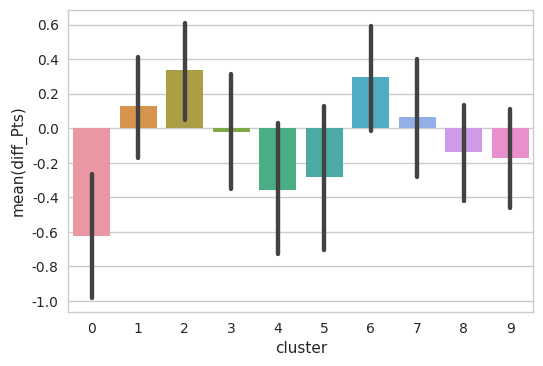

In [281]:
plt.figure(dpi=100)
sns.barplot(x="cluster", y="diff_Pts", data=ldaDf)
plt.show()

## F-test를 통해 각 군집별 차이가 있는지 확인

In [282]:
diff = []
for i in range(10):
    diff.append(np.array(ldaDf["diff_Pts"][ldaDf["cluster"]==i]))

In [283]:
from scipy.stats import stats

stats.f_oneway(diff[0], diff[1], diff[2], diff[3], diff[4], diff[5],
              diff[6], diff[7], diff[8], diff[9])

F_onewayResult(statistic=3.0726399988818054, pvalue=0.0011103670675476211)

### winning per cluster 

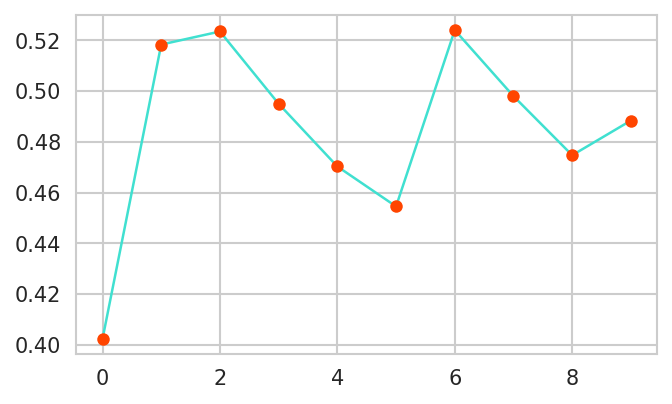

In [416]:
plt.figure(figsize=(5,3), dpi=150)
plt.plot(ldaDf.groupby(["cluster"])["WL"].mean(), color = "turquoise", lw=1.2, marker="o", ms=6, mfc="orangered")
plt.show()

### cluster % per winning team

In [328]:
ldaDf[["Team", "Season"]] =  new_data[["Team", "Season"]]

In [333]:
winning = ldaDf[ldaDf["WL"]==1]

In [340]:
cluster_dummy = pd.get_dummies(winning["cluster"])
cluster_dummy.columns = ["c1","c2","c3","c4","c5","c6","c7","c8","c9","c10"]

In [344]:
winning2 = pd.concat([winning, cluster_dummy], axis=1)
winning2.head()

,0,1,cluster,diff_Pts,WL,Team,Season,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
0,1.155466,-0.539538,2,2.430322,1,Lakers,2005-2006,0,0,1,0,0,0,0,0,0,0
1,0.776395,-0.331341,2,4.790322,1,Thunder,2013-2014,0,0,1,0,0,0,0,0,0,0
2,3.217843,-2.869294,1,3.320322,1,Thunder,2016-2017,0,1,0,0,0,0,0,0,0,0
3,1.130750,-0.520359,2,2.820322,1,Lakers,2006-2007,0,0,1,0,0,0,0,0,0,0
4,2.407624,-1.396580,1,2.420322,1,Cavaliers,2005-2006,0,1,0,0,0,0,0,0,0,0


In [357]:
d = winning2.groupby(["Team", "Season"])["c1","c2","c3","c4","c5","c6","c7","c8","c9","c10"].sum()
d

c1  c2  c3  c4  c5  c6  c7  c8  c9  c10
Team         Season                                            
76ers        2005-2006   0   1   0   0   1   0   2   0   0    1
             2007-2008   1   2   0   1   1   0   1   0   1    1
             2008-2009   1   1   2   2   0   0   1   0   1    1
             2009-2010   0   1   3   2   0   0   1   0   1    1
             2010-2011   1   1   1   1   1   0   0   1   2    0
Bucks        1996-1997   1   0   2   1   0   0   0   2   1    0
             1999-2000   0   0   1   0   0   3   2   1   2    1
             2000-2001   2   0   1   0   1   0   1   1   1    1
             2001-2002   0   1   0   0   0   2   2   2   1    1
             2002-2003   0   1   2   2   1   0   3   0   0    2
             2003-2004   1   1   1   1   0   0   1   2   3    0
             2004-2005   1   2   1   0   0   1   2   1   1    2
             2005-2006   1   1   1   1   0   0   1   0   2    2
             2006-2007   0   2   0   1   1   1   1   0   1    2
             2008-2009   1   2   0   2   1   1   1   1   0    2
             2016-2017   0   1   1   0   1   1   2   1   2    1
Bulls        1996-1997   0   0   2   2   0   0   1   0   1    1
             1997-1998   0   0   2   1   0   0   1   0   1    2
             2008-2009   0   2   1   1   1   0   1   0   1    1
             2010-2011   1   1   1   2   0   0   2   1   1    0
             2011-2012   1   1   0   0   0   0   3   1   1    1
             2014-2015   1   2   0   0   1   0   2   1   0    1
             2016-2017   1   1   5   1   2   0   1   1   1    1
Cavaliers    2004-2005   0   0   2   2   0   0   1   0   1    1
             2005-2006   1   2   2   0   0   0   1   0   1    1
             2006-2007   0   2   3   1   1   0   1   1   0    0
             2007-2008   1   2   3   0   0   0   1   0   1    2
             2008-2009   2   0   3   0   1   0   0   0   2    1
             2009-2010   2   3   3   0   0   0   0   0   0    1
             2014-2015   0   0   3   0   1   0   2   0   1    2
             2015-2016   2   1   2   0   0   0   1   2   0    2
             2016-2017   1   2   2   0   0   0   1   1   0    1
Celtics      2004-2005   0   0   1   0   2   0   2   0   3    2
             2007-2008   0   0   4   2   0   1   1   1   1    0
             2008-2009   0   3   2   1   1   0   1   1   1    0
             2009-2010   1   1   4   1   0   1   1   1   0    0
             2010-2011   2   1   2   0   0   0   1   1   2    0
             2015-2016   0   1   1   3   0   2   0   1   1    1
             2016-2017   0   1   2   2   1   0   0   1   3    0
Clippers     2010-2011   2   2   2   0   0   1   2   1   1    1
             2011-2012   1   1   1   0   1   0   2   1   1    1
             2012-2013   0   1   1   0   0   2   1   1   2    1
             2013-2014   1   1   2   0   0   0   1   1   1    1
             2014-2015   1   1   1   0   0   2   1   1   0    1
             2015-2016   1   0   1   0   0   2   1   2   3    2
             2016-2017   1   1   0   0   0   1   1   1   0    3
Grizzlies    2005-2006   1   1   1   1   0   1   0   0   2    0
             2006-2007   0   2   1   4   1   0   0   2   2    0
             2009-2010   1   2   0   1   0   0   1   1   1    2
             2010-2011   0   2   2   1   0   0   1   1   1    1
             2013-2014   0   3   0   1   0   0   2   1   1    1
             2014-2015   0   3   2   1   0   0   2   1   0    1
             2015-2016   0   2   0   2   0   0   0   1   3    0
             2016-2017   0   1   1   1   1   1   0   2   3    1
Hawks        1996-1997   0   1   3   0   1   0   0   0   0    2
             1997-1998   1   0   2   0   1   1   0   0   1    1
             2005-2006   1   0   3   0   1   1   0   1   2    0
             2007-2008   1   0   1   2   1   0   0   1   2    3
             2008-2009   1   1   1   1   0   0   0   0   2    2
             2009-2010   0   1   1   1   0   1   1   0   1    2
             2010-2011   0   1   1   2   1   1   1   0  

In [370]:
all_team = len(d)
all_team
# (팀, 시즌) 304개가 있음. 

304

In [371]:
# 해당 클러스터의 선수가 있으면 1 없으면 0 해서 더한다 
player = (d != 0 ).sum()
player

c1     148
c2     214
c3     227
c4     170
c5     144
c6     125
c7     217
c8     200
c9     243
c10    235
dtype: int64

In [592]:
clust_win = player/all_team
clust_win = pd.DataFrame(clust_win, columns = ["% on winning team"])
clust_win

,% on winning team
c1,0.486842
c2,0.703947
c3,0.746711
c4,0.559211
c5,0.473684
c6,0.411184
c7,0.713816
c8,0.657895
c9,0.799342
c10,0.773026


In [593]:
nop = pd.DataFrame(ldaDf.groupby("cluster").count()[0])
nop = nop.iloc[:,0]

In [594]:
clust_win = clust_win.reset_index()
del clust_win["index"]

In [595]:
# 대략 50%정도의 선수가 winning team에 속하게 되는데 클러스터별로 분포는 50%에 딱 맞지는 않는다. 
# 이걸 확인하기 위해 각각의 클러스터에 대해 one-sample T-test를 한다.
clust_win["player"] = nop
clust_win.T

,0,1,2,3,4,5,6,7,8,9
% on winning team,0.486842,0.703947,0.746711,0.559211,0.473684,0.411184,0.713816,0.657895,0.799342,0.773026
player,435.000000,654.000000,766.000000,501.000000,404.000000,363.000000,603.000000,502.000000,811.000000,733.000000


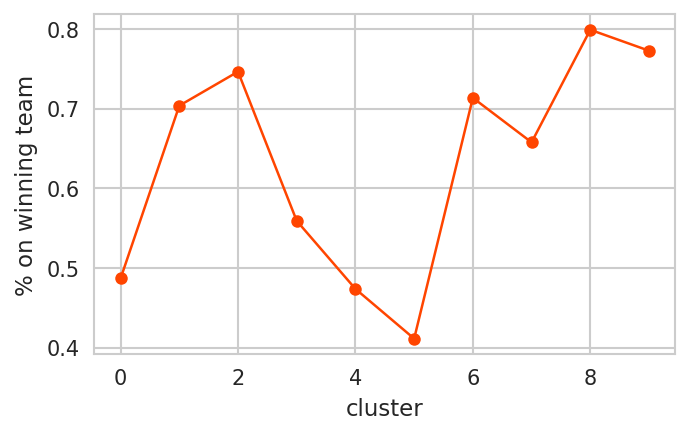

In [598]:
plt.figure(figsize=(5,3), dpi=150)
plt.plot(clust_win.iloc[:,0], color = "orangered", lw=1.2, marker="o", ms=6)
plt.ylabel("% on winning team")
plt.xlabel("cluster")
plt.show()

In [459]:
tsmap = d!=0
label = ["c1","c2","c3","c4","c5","c6","c7","c8","c9","c10"]

for i in label:
    tt = sp.stats.ttest_1samp(tsmap[i], popmean=0.5)
    print(i + "'s pvalue - %0.4f" %tt.pvalue, end=" / ")
    print("number of samples - %d" %len(d[i]))

c1's pvalue - 0.6471 / number of samples - 304
c2's pvalue - 0.0000 / number of samples - 304
c3's pvalue - 0.0000 / number of samples - 304
c4's pvalue - 0.0387 / number of samples - 304
c5's pvalue - 0.3597 / number of samples - 304
c6's pvalue - 0.0018 / number of samples - 304
c7's pvalue - 0.0000 / number of samples - 304
c8's pvalue - 0.0000 / number of samples - 304
c9's pvalue - 0.0000 / number of samples - 304
c10's pvalue - 0.0000 / number of samples - 304


--------

-----

# 4. The effect of pairs and triples

- 농구는 혼자하는 스포츠가 아니다. 승리를 위해서는 5명의 플레이어의 케미가 무엇보다 중요하다. 
- 어떤 포지션의 조합이 winning team에 많이 있는지를 알아본다. <br\>
- Percentage(조합 A의 winning count / 조합 A의 수)를 one-sample T-tests를 해본다. <br\>
- Increase : 새로운 클러스터의 선수를 팀에 포함시키는 것은 팀 득점 차이에 영향을 미친다. <br\>  예)  "10 + 10" 조합은 긍정적인 득점 차이를 일으킬 수도 있다. 78.95(10,10) - 66.67(10) = 12.3


In [461]:
ldaDf.head()

,0,1,cluster,diff_Pts,WL,Team,Season
0,1.155466,-0.539538,2,2.430322,1,Lakers,2005-2006
1,0.776395,-0.331341,2,4.790322,1,Thunder,2013-2014
2,3.217843,-2.869294,1,3.320322,1,Thunder,2016-2017
3,1.130750,-0.520359,2,2.820322,1,Lakers,2006-2007
4,2.407624,-1.396580,1,2.420322,1,Cavaliers,2005-2006


In [603]:
# 데이터프레임과 클러스터 2개를 넣으면 pair에 대한 승리 확률 말해줌 
def pair_clus(df, n1, n2):
    col = ["c"+str(n1+1), "c"+str(n2+1)]
    
    temp = df[(df["cluster"]==n1) | (df["cluster"]==n2)]
    temp_dummy = pd.get_dummies(temp["cluster"])
    temp_dummy.columns = col
    temp = pd.concat([temp, temp_dummy], axis=1)
    
    group = temp.groupby(["Team", "Season"])[["WL", col[0], col[1]]].sum()
    group = group!=0
    group["pair"] = group[col[0]] * group[col[1]]
    group = group[group["pair"]==True]
    percentage = (group["WL"].sum() / group["WL"].count()).round(3) * 100

    print("=======================")
    print("Pair : (" + col[0] + ", " + col[1] + ")")
    print("Total games", group["WL"].count().round(3))
    print("Winning games", group["WL"].sum().round(3))
    print("Percentage : ", percentage, "%")
    
    return (col[0], col[1], percentage.round(3))

In [604]:
# 모든 pair 만들기 (같은 포지션은 일단 제외)
pairlist = []
for i in range(10):
    for j in range(i+1):
        if (i != j):
            pairlist.append([i, j])

In [605]:
pair_result = []
for pair in pairlist:
    pair_result.append(pair_clus(ldaDf, pair[0], pair[1]))

Pair : (c2, c1)
Total games 240
Winning games 108
Percentage :  45.0 %
Pair : (c3, c1)
Total games 243
Winning games 107
Percentage :  44.0 %
Pair : (c3, c2)
Total games 292
Winning games 147
Percentage :  50.3 %
Pair : (c4, c1)
Total games 168
Winning games 76
Percentage :  45.2 %
Pair : (c4, c2)
Total games 236
Winning games 120
Percentage :  50.8 %
Pair : (c4, c3)
Total games 256
Winning games 129
Percentage :  50.4 %
Pair : (c5, c1)
Total games 138
Winning games 57
Percentage :  41.3 %
Pair : (c5, c2)
Total games 195
Winning games 98
Percentage :  50.3 %
Pair : (c5, c3)
Total games 216
Winning games 102
Percentage :  47.2 %
Pair : (c5, c4)
Total games 151
Winning games 64
Percentage :  42.4 %
Pair : (c6, c1)
Total games 129
Winning games 45
Percentage :  34.9 %
Pair : (c6, c2)
Total games 188
Winning games 84
Percentage :  44.7 %
Pair : (c6, c3)
Total games 210
Winning games 94
Percentage :  44.8 %
Pair : (c6, c4)
Total games 161
Winning games 69
Percentage :  42.9 %
Pair : (c6, c5

In [608]:
pd.DataFrame(pair_result).sort_values(by=2, ascending=False)

,0,1,2
42,c10,c7,54.6
16,c7,c2,53.7
17,c7,c3,53.1
43,c10,c8,52.8
34,c9,c7,52.4
35,c9,c8,51.8
37,c10,c2,51.4
25,c8,c5,51.3
27,c8,c7,51.2
18,c7,c4,51.1


### pair_clus 함수 과정 (참고)

In [587]:
df17 = ldaDf[(ldaDf["cluster"]==2) | (ldaDf["cluster"]==5)]
df17.shape

(1129, 7)

In [588]:
df17_dummy = pd.get_dummies(df17["cluster"])
df17_dummy.columns = ["c2", "c5"]
df17 = pd.concat([df17, df17_dummy], axis=1)
df17.head()

,0,1,cluster,diff_Pts,WL,Team,Season,c2,c5
0,1.155466,-0.539538,2,2.430322,1,Lakers,2005-2006,1,0
1,0.776395,-0.331341,2,4.790322,1,Thunder,2013-2014,1,0
3,1.130750,-0.520359,2,2.820322,1,Lakers,2006-2007,1,0
8,2.009380,-0.785760,2,1.050322,1,Lakers,2002-2003,1,0
9,2.413485,-0.870054,2,0.480322,1,Cavaliers,2007-2008,1,0


In [589]:
group17 = df17.groupby(["Team","Season"])[["WL", "c2", "c5"]].sum()
group17

WL  c2  c5
Team         Season               
76ers        1996-1997   0   0   1
             1997-1998   0   1   1
             1999-2000   0   0   1
             2000-2001   0   2   0
             2001-2002   0   1   0
             2003-2004   0   1   0
             2004-2005   0   1   0
             2006-2007   0   1   0
             2008-2009   2   2   0
             2009-2010   3   3   0
             2010-2011   1   1   0
             2012-2013   0   3   1
             2013-2014   0   1   1
             2015-2016   0   0   5
             2016-2017   0   1   2
Bobcats      2004-2005   0   1   1
             2005-2006   0   0   1
             2009-2010   0   1   0
             2010-2011   0   2   2
             2011-2012   0   0   1
             2012-2013   0   1   1
             2013-2014   0   0   1
Bucks        1996-1997   2   2   0
             1997-1998   0   2   0
             1998-1999   0   1   0
             1999-2000   4   1   3
             2000-2001   1   1   0
             2001-2002   2   0   2
             2002-2003   2   2   0
             2003-2004   1   1   0
             2004-2005   2   1   1
             2005-2006   1   1   0
             2006-2007   1   0   1
             2007-2008   0   1   1
             2008-2009   1   0   1
             2009-2010   0   1   1
             2011-2012   0   1   0
             2012-2013   0   1   0
             2013-2014   0   2   0
             2014-2015   0   2   1
             2015-2016   0   2   0
             2016-2017   2   1   1
Bulls        1996-1997   2   2   0
             1997-1998   2   2   0
             1998-1999   0   3   1
             1999-2000   0   3   1
             2000-2001   0   1   0
             2001-2002   0   1   1
             2003-2004   0   1   1
             2004-2005   0   2   0
             2005-2006   0   0   1
             2006-2007   0   1   1
             2007-2008   0   1   1
             2008-2009   1   1   0
             2009-2010   0   1   0
             2010-2011   1   1   0
             2012-2013   0   2   0
             2015-2016   0   3   0
             2016-2017   5   5   0
Cavaliers    1996-1997   0   1   1
             1997-1998   0   1   0
             1998-1999   0   2   0
             1999-2000   0   1   0
             2000-2001   0   1   0
             2001-2002   0   1   0
             2002-2003   0   0   1
             2003-2004   0   2   0
             2004-2005   2   2   0
             2005-2006   2   2   0
             2006-2007   3   3   0
             2007-2008   3   3   0
             2008-2009   3   3   0
             2009-2010   3   3   0
             2010-2011   0   1   0
             2011-2012   0   1   0
             2012-2013   0   1   1
             2013-2014   0   1   0
             2014-2015   3   3   0
             2015-2016   2   2   0
             2016-2017   2   2   0
Celtics      1996-1997   0   1   2
             1997-1998   0   0   1
             1998-1999   0   0   1
             2001-2002   0   2   1
             2002-2003   0   1   0
             2004-2005   1   1   0
             2005-2006   0   2   1
             2006-2007   0   3   0
             2007-2008   5   4   1
             2008-2009   2   2   0
             2009-2010   5   4   1
             2010-2011   2   2   0
             2011-2012   0   4   0
             2012-2013   0   3   0
             2013-2014   0   2   0
             2014-2015   0   3   0
             2015-2016   3   1   2
             2016-2017   2   2   0
Clippers     1996-1997   0   1   2
             1997-1998   0   2   1
             1998-1999   0   2   1
             1999-2000   0   2   1
             2002-2003   0   1   1
             2003-2004   0   1   0
             2004-2005   0   1   0
             2005-2006   0   1   0
             2006-2007   0   1   0
             2007-2008   0   0   1
             2008-2009   0   1   0
             2009-2010   0   0   1
             2010-2011   3   2   1
             2011-2012   1   1   0
             2012-2013   3   1   2

In [552]:
group17 = group17!=0

In [553]:
group17["pair"] = group17["c2"] * group17["c5"]

In [554]:
group17 = group17[group17["pair"]==True]

In [555]:
percentage = group17["WL"].sum() / group17["WL"].count()
percentage

0.44761904761904764